In [145]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [146]:

df = pd.read_csv('2017.csv')
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,...,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,...,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN


In [147]:
print("Number of unique op_carries: ", len(df['OP_CARRIER'].unique()))
df['OP_CARRIER'].value_counts()

Number of unique op_carries:  12


WN    1329444
DL     923560
AA     896348
OO     706527
UA     584481
EV     339541
B6     298654
AS     185068
NK     156818
F9     103027
HA      80172
VX      70981
Name: OP_CARRIER, dtype: int64

In [148]:
# take 70981 samples from each carrier
df = df.groupby('OP_CARRIER').apply(lambda x: x.sample(n=70981, random_state=1))
df['OP_CARRIER'].value_counts()

AA    70981
AS    70981
B6    70981
DL    70981
EV    70981
F9    70981
HA    70981
NK    70981
OO    70981
UA    70981
VX    70981
WN    70981
Name: OP_CARRIER, dtype: int64

In [149]:
df['FL_DAY'] = df['FL_DATE'].map(lambda x: x.split('-')[2])
df['FL_MONTH'] = df['FL_DATE'].map(lambda x: x.split('-')[1])
df['FL_YEAR'] = df['FL_DATE'].map(lambda x: x.split('-')[0])
df['FL_YEAR'] = df['FL_YEAR'].astype(int)
df['FL_MONTH'] = df['FL_MONTH'].astype(int)
df['FL_DAY'] = df['FL_DAY'].astype(int)
df = df.dropna(subset=['ARR_TIME', 'DEP_TIME', 'DEP_DELAY', 'ARR_DELAY', 'CRS_DEP_TIME', 'CRS_ARR_TIME'])
df['CRS_DEP_HOUR'] = df['CRS_DEP_TIME'].map(lambda x: int(x/100))
df['CRS_DEP_MIN'] = df['CRS_DEP_TIME'].map(lambda x: int(x%100))
# split the DEP_TIME into hours and minutes
df['DEP_TIME_HOUR'] = df['DEP_TIME'].map(lambda x: int(x/100))
df['DEP_TIME_MIN'] = df['DEP_TIME'].map(lambda x: int(x%100))
# split the WHEELS_OFF into hours and minutes
df['WHEELS_OFF_HOUR'] = df['WHEELS_OFF'].map(lambda x: int(x/100))
df['WHEELS_OFF_MIN'] = df['WHEELS_OFF'].map(lambda x: int(x%100))
# split the WHEELS_ON into hours and minutes
df['WHEELS_ON_HOUR'] = df['WHEELS_ON'].map(lambda x: int(x/100))
df['WHEELS_ON_MIN'] = df['WHEELS_ON'].map(lambda x: int(x%100))
# split the CRS_ARR_TIME into hours and minutes
df['CRS_ARR_HOUR'] = df['CRS_ARR_TIME'].map(lambda x: int(x/100))
df['CRS_ARR_MIN'] = df['CRS_ARR_TIME'].map(lambda x: int(x%100))
# split the ARR_TIME into hours and minutes
df['ARR_TIME_HOUR'] = df['ARR_TIME'].map(lambda x: int(x/100))
df['ARR_TIME_MIN'] = df['ARR_TIME'].map(lambda x: int(x%100))
# drop the columns that are not required- CRS_DEP_TIME, DEP_TIME, WHEELS_OFF, WHEELS_ON, CRS_ARR_TIME, ARR_TIME
df = df.drop(columns=['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME'])




In [150]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [151]:
df = encode(df,'CRS_DEP_HOUR', 24)
df = encode(df,'CRS_DEP_MIN', 60)
df = encode(df,'DEP_TIME_HOUR', 24)
df = encode(df,'DEP_TIME_MIN', 60)
df = encode(df,'WHEELS_OFF_HOUR', 24)
df = encode(df,'WHEELS_OFF_MIN', 60)
df = encode(df,'WHEELS_ON_HOUR', 24)
df = encode(df,'WHEELS_ON_MIN', 60)
df = encode(df,'CRS_ARR_HOUR', 24)
df = encode(df,'CRS_ARR_MIN', 60)
df = encode(df,'ARR_TIME_HOUR', 24)
df = encode(df,'ARR_TIME_MIN', 60)

df['FL_MONTH'] = df['FL_MONTH']-1
df['FL_DAY'] = df['FL_DAY']-1
df = encode(df,'FL_MONTH', 12)
df = encode(df,'FL_DAY', 31)

In [152]:
df = df.drop(columns=['CRS_DEP_HOUR', 'CRS_DEP_MIN', 'DEP_TIME_HOUR', 'DEP_TIME_MIN', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MIN', 'WHEELS_ON_HOUR', 'WHEELS_ON_MIN', 'CRS_ARR_HOUR', 'CRS_ARR_MIN', 'ARR_TIME_HOUR', 'ARR_TIME_MIN', 'FL_MONTH', 'FL_DAY'])



In [153]:
print(df.isnull().sum())
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)
print(df.isnull().sum())


FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
DEP_DELAY                   0
TAXI_OUT                    0
TAXI_IN                     0
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE      836592
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY          675025
WEATHER_DELAY          675025
NAS_DELAY              675025
SECURITY_DELAY         675025
LATE_AIRCRAFT_DELAY    675025
Unnamed: 27            836592
FL_YEAR                     0
CRS_DEP_HOUR_sin            0
CRS_DEP_HOUR_cos            0
CRS_DEP_MIN_sin             0
CRS_DEP_MIN_cos             0
DEP_TIME_HOUR_sin           0
DEP_TIME_HOUR_cos           0
DEP_TIME_MIN_sin            0
DEP_TIME_MIN_cos            0
WHEELS_OFF_HOUR_sin         0
WHEELS_OFF_HOUR_cos         0
WHEELS_OFF

In [154]:
# drop FL_DATE,Cancellation code,op_Carrierflnum
df = df.drop(columns=['FL_DATE', 'CANCELLATION_CODE', 'OP_CARRIER_FL_NUM'])
print(df.shape)
df.head()

(836592, 48)


OP_CARRIER ORIGIN DEST  DEP_DELAY  TAXI_OUT  TAXI_IN  \
OP_CARRIER                                                                
AA         1389498         AA    PHX  STL       -6.0      21.0      4.0   
           5204087         AA    CLT  DEN       -5.0      16.0      8.0   
           3188972         AA    DFW  TUL       -6.0      16.0      4.0   
           2306485         AA    DFW  ELP       50.0      23.0      3.0   
           4475154         AA    ALB  CLT       -7.0       9.0      5.0   

                    ARR_DELAY  CANCELLED  DIVERTED  CRS_ELAPSED_TIME  ...  \
OP_CARRIER                                                            ...   
AA         1389498      -17.0        0.0       0.0             178.0  ...   
           5204087      -26.0        0.0       0.0             235.0  ...   
           3188972       -2.0        0.0       0.0              62.0  ...   
           2306485       49.0        0.0       0.0             105.0  ...   
           4475154      -21.0        0.0       0.0             125.0  ...   

                    CRS_ARR_MIN_sin  CRS_ARR_MIN_cos  ARR_TIME_HOUR_sin  \
OP_CARRIER                                                                
AA         1389498        -0.994522        -0.104528          -0.258819   
           5204087        -0.587785         0.809017          -0.258819   
           3188972         0.994522         0.104528          -0.707107   
           2306485         0.866025         0.500000          -0.500000   
           4475154         0.978148        -0.207912          -0.866025   

                    ARR_TIME_HOUR_cos  ARR_TIME_MIN_sin  ARR_TIME_MIN_cos  \
OP_CARRIER                                                                  
AA         1389498          -0.965926          0.309017         -0.951057   
           5204087          -0.965926          0.207912         -0.978148   
           3188972           0.707107          0.951057          0.309017   
           2306485          -0.866025         -0.104528          0.994522   
           4475154           0.500000         -0.406737          0.913545   

                    FL_MONTH_sin  FL_MONTH_cos  FL_DAY_sin  FL_DAY_cos  
OP_CARRIER                                                              
AA         1389498  1.000000e+00  6.123234e-17    0.394356    0.918958  
           5204087 -8.660254e-01  5.000000e-01   -0.394356    0.918958  
           3188972  1.224647e-16 -1.000000e+00   -0.998717   -0.050649  
           2306485  5.000000e-01 -8.660254e-01    0.000000    1.000000  
           4475154 -1.000000e+00 -1.836970e-16    0.651372   -0.758758  

[5 rows x 48 columns]

In [155]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['DEP_DELAY'])
y = df['DEP_DELAY']
label_encoder_op_carrier = LabelEncoder()
label_encoder_origin = LabelEncoder()
label_encoder_dest = LabelEncoder()
X['OP_CARRIER'] = label_encoder_op_carrier.fit_transform(X['OP_CARRIER'])
X['ORIGIN'] = label_encoder_origin.fit_transform(X['ORIGIN'])
X['DEST'] = label_encoder_dest.fit_transform(X['DEST'])

In [156]:
print(X)

                    OP_CARRIER  ORIGIN  DEST  TAXI_OUT  TAXI_IN  ARR_DELAY  \
OP_CARRIER                                                                   
AA         1389498           0     236   289      21.0      4.0      -17.0   
           5204087           0      66    82      16.0      8.0      -26.0   
           3188972           0      83   302      16.0      4.0       -2.0   
           2306485           0      83    96      23.0      3.0       49.0   
           4475154           0      14    66       9.0      5.0      -21.0   
...                        ...     ...   ...       ...      ...        ...   
WN         1698267          11     280   265      13.0      4.0       35.0   
           2300980          11     280   172      10.0      9.0       -4.0   
           1271774          11       2    82       8.0      4.0       -9.0   
           4429936          11      82   213      12.0      3.0       -8.0   
           620344           11     236    89       7.0      6.0 

In [206]:
import torch
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_of_features = X_train.shape[1]
num_of_epochs = 50
learning_rate = 1e-6

In [207]:
X_train.isnull().sum()
# are there any nan values in the dataset
print(X_train.isnull().values.any())
# if there is any nan value, then fill it with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
print(X_train.isnull().values.any())
print(y_train.isnull().values.any())


True
False
False


In [208]:
#applying linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))




Mean Absolute Error: 0.0017213985919974878
Mean Squared Error: 5.820532058995866e-06
R2 Score: 0.9999999969923459


In [209]:
print(y_pred)


[50.99914176 -2.00067748 -2.99707404 ... -9.99844525  4.99982828
 -6.0008481 ]


In [210]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(669273, 47)
(669273,)
(167319, 47)
(167319,)


Epoch [1/10], Loss: -0.0713, Batch Number: 20915
Epoch [1/10], Loss: -0.0713
Epoch [2/10], Loss: -0.0721, Batch Number: 20915
Epoch [2/10], Loss: -0.0721
Epoch [3/10], Loss: -0.0719, Batch Number: 20915
Epoch [3/10], Loss: -0.0719
Epoch [4/10], Loss: -0.0717, Batch Number: 20915
Epoch [4/10], Loss: -0.0717
Epoch [5/10], Loss: -0.0725, Batch Number: 20915
Epoch [5/10], Loss: -0.0725
Epoch [6/10], Loss: -0.0722, Batch Number: 20915
Epoch [6/10], Loss: -0.0722
Epoch [7/10], Loss: -0.0718, Batch Number: 20915
Epoch [7/10], Loss: -0.0718
Epoch [8/10], Loss: -0.0727, Batch Number: 20915
Epoch [8/10], Loss: -0.0727
Epoch [9/10], Loss: -0.0716, Batch Number: 20915
Epoch [9/10], Loss: -0.0716
Epoch [10/10], Loss: -0.0722, Batch Number: 20915
Epoch [10/10], Loss: -0.0722
fc1.weight: tensor([[ 0.0914,  0.0550, -0.1028, -0.1319, -0.0520, -0.0741, -0.0945,  0.0525,
         -0.0992,  0.0152,  0.0143,  0.1183, -0.0762, -0.0769, -0.1334, -0.0050,
         -0.0984,  0.1316, -0.0370,  0.0662, -0.0459, 

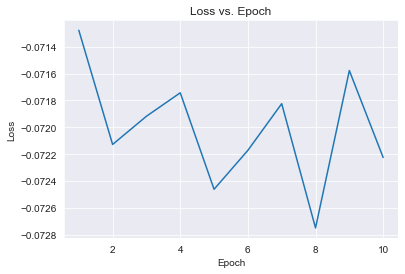

In [211]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming you have x_train and y_train as tensors
# Make sure to load your actual dataset here

# Define the neural network model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 4)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(4, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = LinearRegressionModel(47)

# Define loss function and optimizer
# use R2 loss function


optimizer = optim.SGD(model.parameters(), lr=1e-2)  # Stochastic Gradient Descent

# Prepare data using DataLoader
batch_size = 32
# chnage df X_train to numpy
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()


dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_x)

        # Compute the loss using r2 loss function
        loss = metrics.r2_score(batch_y, outputs.detach().numpy())
        epoch_loss += loss.item()

        # Backpropagation and optimization
        optimizer.zero_grad()
        # loss.backward()
        optimizer.step()
    #     print(loss,batch number and loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss / len(dataloader):.4f}, Batch Number: {len(dataloader)}')

    # Append the average loss for this epoch to the list
    losses.append(epoch_loss / len(dataloader))

    # Print the loss at the end of each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {losses[-1]:.4f}')

# Print the final learned parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')

# Optionally, plot the loss versus epoch
import matplotlib.pyplot as plt
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()


In [213]:
# chnage df X_test to numpy and then to tensor
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
y_pred = model(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred.detach().numpy()))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred.detach().numpy()))
print('R2 Score:', metrics.r2_score(y_test, y_pred.detach().numpy()))



Mean Absolute Error: 17.376799
Mean Squared Error: 2011.6704
R2 Score: -0.03949399378312446
